In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
Bank_Churn=pd.read_csv("/content/Bank_Churn.csv")

In [9]:
Bank_Churn.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
Bank_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [11]:
Bank_Churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:

grouped = Bank_Churn.groupby('Exited')
mean_values = grouped.mean(numeric_only=True)
print(mean_values)


          CustomerId  CreditScore        Age    Tenure       Balance  \
Exited                                                                 
0       1.569117e+07   651.853196  37.408389  5.033279  72745.296779   
1       1.569005e+07   645.351497  44.837997  4.932744  91108.539337   

        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
Exited                                                             
0            1.544267   0.707146        0.554565     99738.391772  
1            1.475209   0.699067        0.360825    101465.677531  


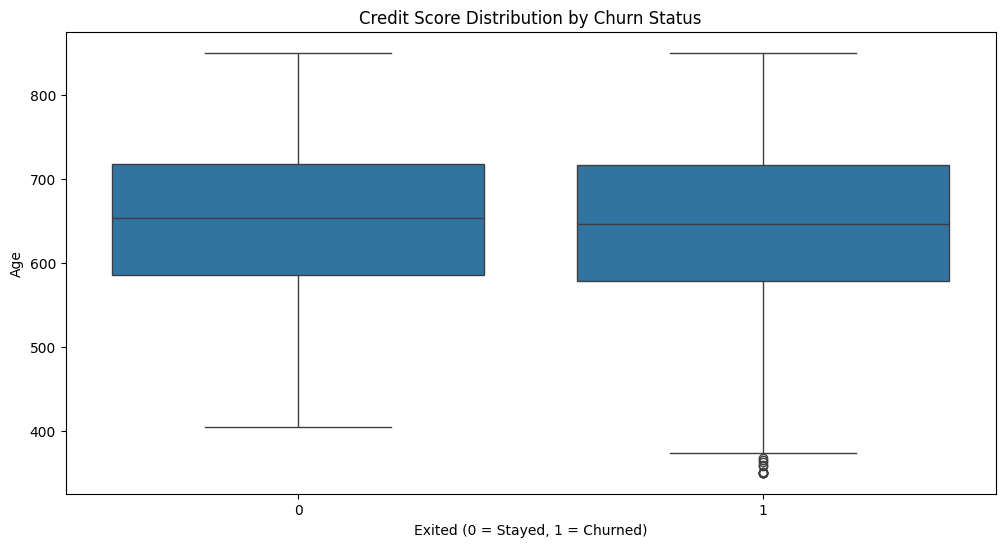

In [18]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Exited', y='CreditScore', data=Bank_Churn)
plt.title('Credit Score Distribution by Churn Status')
plt.xlabel('Exited (0 = Stayed, 1 = Churned)')
plt.ylabel('Age')
plt.show()


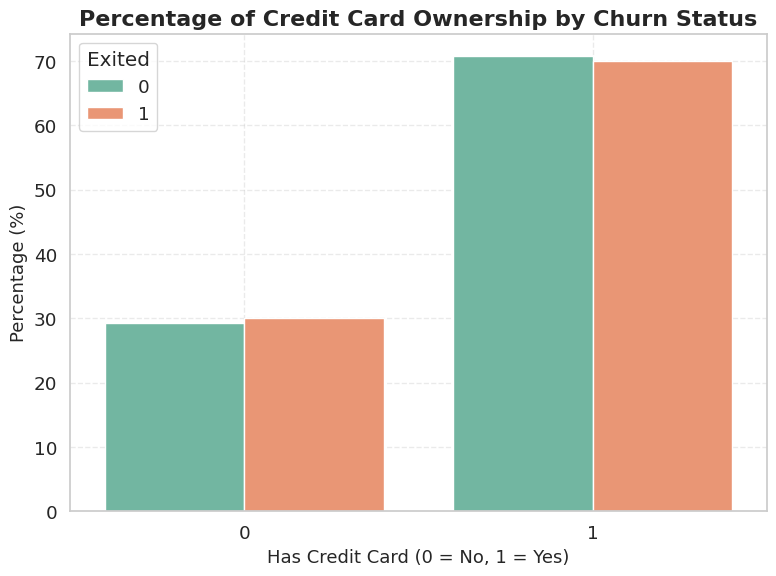

In [31]:

percentage_df = Bank_Churn.groupby(['Exited', 'HasCrCard']).size().reset_index(name='Count')
total_per_group = percentage_df.groupby('Exited')['Count'].transform('sum')
percentage_df['Percentage'] = (percentage_df['Count'] / total_per_group) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x='HasCrCard', y='Percentage', hue='Exited', data=percentage_df, palette='Set2')

plt.title('Percentage of Credit Card Ownership by Churn Status', fontsize=16, weight='bold')
plt.xlabel('Has Credit Card (0 = No, 1 = Yes)', fontsize=13)
plt.ylabel('Percentage (%)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



In [32]:
Bank_Churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


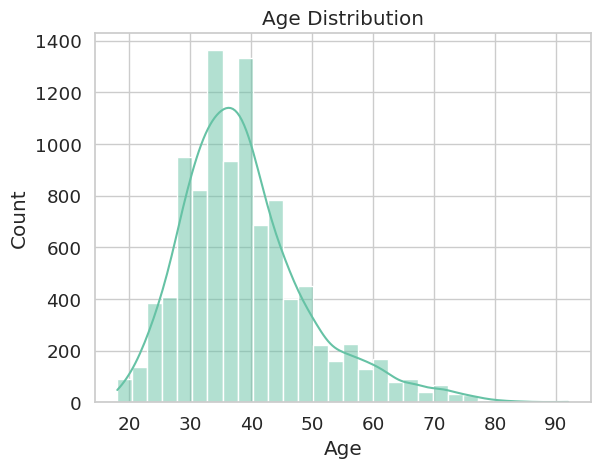

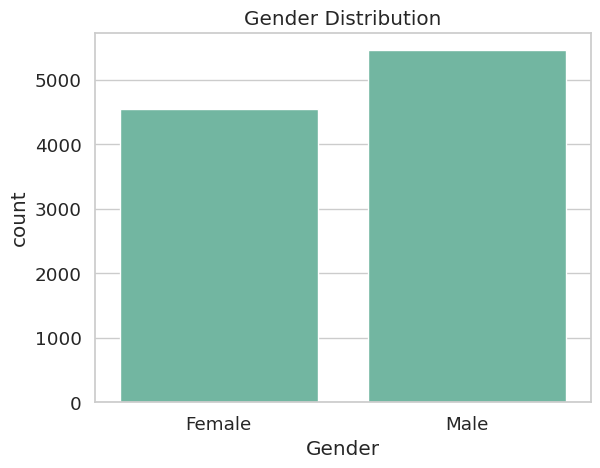

In [44]:
sns.histplot(Bank_Churn['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='Gender', data=Bank_Churn)
plt.title('Gender Distribution')
plt.show()



In [45]:
import pandas as pd
import plotly.express as px

eu_data = pd.DataFrame({
    'Country': ['France', 'Germany', 'Spain'],
    'Count': [3500, 3000, 2500]
})

eu_data['Country'] = eu_data['Country'].str.strip().replace({
    'france': 'France',
    'Germany': 'Germany',
    'Spain': 'Spain'
})

fig = px.choropleth(
    eu_data,
    locations='Country',
    locationmode='country names',
    color='Count',
    title='Customer Distribution in Selected EU Countries',
    color_continuous_scale='Blues',
    projection='natural earth'
)

fig.update_geos(
    showcountries=True,
    showcoastlines=True,
    showland=True,
    fitbounds="locations"
)

fig.update_layout(
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.show()



In [53]:
import pandas as pd

churn_by_country = Bank_Churn.groupby('Geography')['Exited'].mean().reset_index()
print(churn_by_country)





  Geography    Exited
0    France  0.161548
1   Germany  0.324432
2     Spain  0.166734


/tmp/ipython-input-1864753595.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




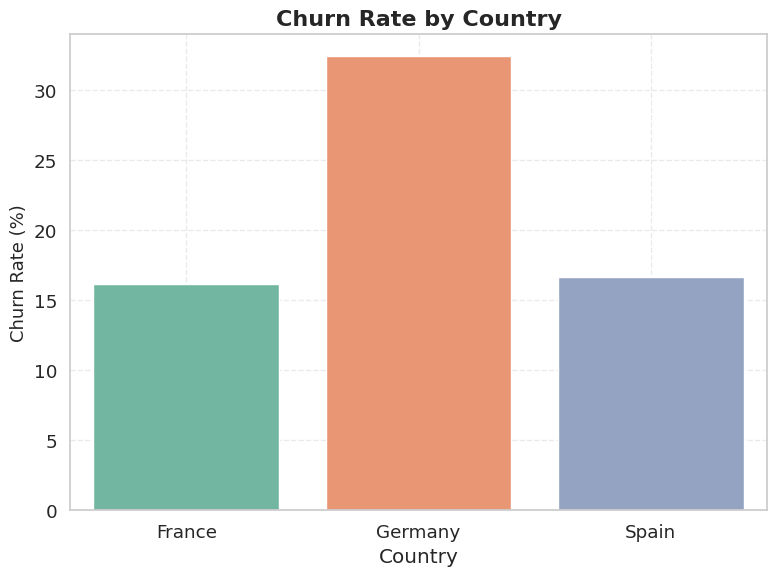

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

churn_counts = Bank_Churn.groupby('Geography')['Exited'].sum()


total_counts = Bank_Churn['Geography'].value_counts()

churn_rate = (churn_counts / total_counts) * 100

churn_rate_df = churn_rate.reset_index()
churn_rate_df.columns = ['Country', 'Churn Rate (%)']
plt.figure(figsize=(8, 6))
sns.barplot(x='Country', y='Churn Rate (%)', data=churn_rate_df, palette='Set2')

plt.title('Churn Rate by Country', fontsize=16, weight='bold')
plt.ylabel('Churn Rate (%)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['Balance', 'NumOfProducts', 'IsActiveMember', 'CreditScore', 'Tenure']
X = Bank_Churn[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
Bank_Churn['Segment'] = kmeans.fit_predict(X_scaled)

print(Bank_Churn['Segment'].value_counts())


Segment
2    3565
1    3416
0    3019
Name: count, dtype: int64
